In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# train test split

In [3]:
from keras.utils import image_dataset_from_directory

In [4]:
ds_train = image_dataset_from_directory('../data/french_bird_db_100_50', labels='inferred', image_size=(300, 300), validation_split=0.2, subset="training",
seed=42,)

ds_test = image_dataset_from_directory('../data/french_bird_db_100_50', labels='inferred', image_size=(300, 300), validation_split=0.2, subset="validation",
seed=42,)

Found 4969 files belonging to 100 classes.
Using 3976 files for training.
Found 4969 files belonging to 100 classes.
Using 993 files for validation.


2024-06-28 15:47:36.066948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


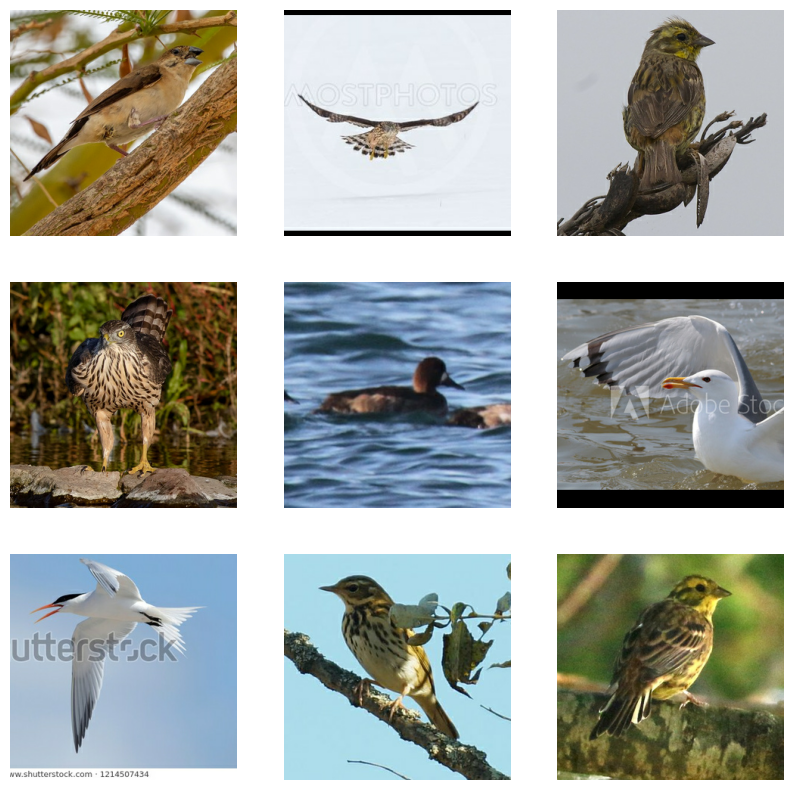

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [6]:
# Obtenir le nombre de classes à partir de ds
num_classes = len(ds_train.class_names)
print('Nombre de classes :', num_classes)

Nombre de classes : 100


In [7]:
import tensorflow as tf

# Convertir les étiquettes cibles en vecteurs one-hot
ds_train = ds_train.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
ds_test = ds_test.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

tf.config.list_physical_devices()

# Charger le modèle ResNet50 pré-entraîné avec les poids ImageNet
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Ajouter une couche de pooling global pour réduire la dimensionalité
x = base_model.output
x_2 = GlobalAveragePooling2D()(x)

x_3 = Dense(num_classes, activation='relu')(x_2)

# Ajouter une couche dense pour effectuer la classification
output = Dense(num_classes, activation='softmax')(x_3)

# Créer le modèle final en combinant le modèle de base et les couches supplémentaires
model = Model(inputs=base_model.input, outputs=output)

# Geler les couches du modèle de base pour éviter de les entraîner
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             TensorBoard(log_dir='./logs/relu', histogram_freq=0, write_graph=True, write_images=True)]

# # Finally fit the model
# model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
#           epochs=10, batch_size=64, callbacks=callbacks_2)

# Entraîner le modèle sur votre dataset avec le callback personnalisé

history = model.fit(ds_train, epochs=10, batch_size=10, callbacks=callbacks, validation_data=ds_test)

Epoch 1/10


2024-06-28 15:47:39.519953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


125/125 ━━━━━━━━━━━━━━━━━━━━ 120s 902ms/step - accuracy: 0.0531 - loss: 4.4112 - val_accuracy: 0.1712 - val_loss: 3.3840
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 109s 872ms/step - accuracy: 0.3177 - loss: 2.7904 - val_accuracy: 0.3202 - val_loss: 2.5753
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 117s 936ms/step - accuracy: 0.4928 - loss: 1.9057 - val_accuracy: 0.3968 - val_loss: 2.1974
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 538s 868ms/step - accuracy: 0.5916 - loss: 1.5053 - val_accuracy: 0.4280 - val_loss: 2.0725
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 839ms/step - accuracy: 0.6724 - loss: 1.2237 - val_accuracy: 0.4975 - val_loss: 1.9031
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 843ms/step - accuracy: 0.7251 - loss: 1.0134 - val_accuracy: 0.5116 - val_loss: 1.8243
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 856ms/step - accuracy: 0.7918 - loss: 0.8357 - val_accuracy: 0.5096 - val_loss: 1.7999
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 109s 871ms/step - accuracy: 0.8176 - loss: 0.72